# Use CIFAR10 dataset

In [1]:
from tensorflow import keras 
import tensorflow as tf 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib as mpl 

In [2]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
# get cifar 10 dataset 
(X_train_full, y_train_full), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [4]:
X_train_full.shape

(50000, 32, 32, 3)

In [5]:
y_train_full.shape

(50000, 1)

In [6]:
y_train_full[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

### Scale input and labels 

In [7]:
# scale the input image 
X_train_scaled = X_train_full/255.0
X_test_scaled = X_test/255.0 

# convert the categorical labels using one hot encoding 
y_train_scaled = keras.utils.to_categorical(y_train_full)
y_test_scaled = keras.utils.to_categorical(y_test)

In [8]:
y_train_scaled[:10]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]])

# Explore the data

In [9]:
lookup_values = {
    0 : "Airplane", 
    1 : "Automobile", 
    2 : "Bird",
    3 : "Cat", 
    4 : "Deer", 
    5 : "Dog", 
    6 : "Frog",
    7 : "Horse", 
    8 : "Ship", 
    9 : "Truck"
}

In [10]:
def plot_sample(X, y, index=None, digit_lookup=False): 
    plt.figure(figsize=(10, 1))
    plt.imshow(X[index])
    plt.axis("off")
    if digit_lookup:
        plt.title(y[index])
    else:
        plt.title(lookup_values.get(np.argmax(y[index]), "NA"))

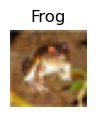

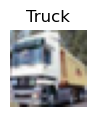

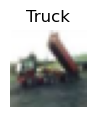

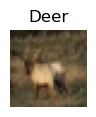

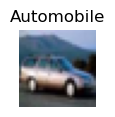

In [11]:
for i in range(0,5): 
    plot_sample(X_train_scaled, y_train_scaled, index=i)

# Create ANN without convolution

In [12]:
# create model 
model_a = keras.models.Sequential()
model_a.add(keras.layers.Flatten(input_shape=(32, 32, 3)))
model_a.add(keras.layers.Dense(3000, activation="relu"))
model_a.add(keras.layers.Dense(1000, activation="relu"))
model_a.add(keras.layers.Dense(10, activation="softmax"))

# compile the model using adam optimizer and since we have not performed one hot encoding for y -> perform sparse categorical cross entropy
model_a.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

/Users/rohitabhishek/miniconda3/envs/mlenv/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
2025-06-21 15:25:34.334886: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2025-06-21 15:25:34.334910: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2025-06-21 15:25:34.334916: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2025-06-21 15:25:34.334933: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-06-21 15:25:34.334943: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow devi

In [13]:
# train this model using CPU on mac 
history = model_a.fit(X_train_scaled, y_train_scaled, epochs=10)

Epoch 1/10


2025-06-21 15:25:35.771812: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 35s 22ms/step - accuracy: 0.1443 - loss: 27.4882
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.1706 - loss: 16.2866
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.1712 - loss: 16.8863
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.1781 - loss: 14.7802
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.1732 - loss: 17.0431
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.1759 - loss: 16.6440
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 35s 22ms/step - accuracy: 0.1747 - loss: 17.8408
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - accuracy: 0.1756 - loss: 16.8073
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 34s 21ms/step - accuracy: 0.1830 - loss: 16.3413
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - accuracy: 0.1832 - loss: 16.7884


``` 
Very poor performance. Lets evaluate Test dataset as well 

In [14]:
model_a.evaluate(X_test_scaled, y_test_scaled)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.1443 - loss: 21.0319


[20.81827735900879, 0.14710000157356262]

# Use CNN model 

In [15]:
model_b = keras.models.Sequential() 

# CNN Layer
model_b.add(keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation="relu", input_shape=(32, 32, 3)))
model_b.add(keras.layers.MaxPooling2D((2, 2)))
model_b.add(keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation="relu"))
model_b.add(keras.layers.MaxPooling2D((2, 2)))

# ANN Layer 
model_b.add(keras.layers.Flatten())
model_b.add(keras.layers.Dense(256, activation="relu"))
model_b.add(keras.layers.Dense(10, activation="softmax"))

model_b.summary()

/Users/rohitabhishek/miniconda3/envs/mlenv/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 612,042 (2.33 MB)

 Trainable params: 612,042 (2.33 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
model_b.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [17]:
# train the CNN model 
# with tf.device('/CPU:0'):
history_b=model_b.fit(X_train_scaled, y_train_scaled, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 28s 17ms/step - accuracy: 0.4212 - loss: 1.6056
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - accuracy: 0.5979 - loss: 1.1733
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - accuracy: 0.5736 - loss: 1.5138
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - accuracy: 0.5241 - loss: 2.9563
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - accuracy: 0.4908 - loss: 6.5946
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - accuracy: 0.4687 - loss: 15.7662
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - accuracy: 0.4622 - loss: 28.4943
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - accuracy: 0.4536 - loss: 49.8886
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - accuracy: 0.4382 - loss: 87.1570
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - accuracy: 0.4281 - loss: 129.9111


``` 
Look like we are reaching more accuracy when using CPU; GPU + CPU is giving about 40% accuracy 

In [18]:
# evaluate the model 
# with tf.device('/CPU:0'):
model_b.evaluate(X_test_scaled, y_test_scaled)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.4063 - loss: 204.1167


[202.532958984375, 0.40630000829696655]

``` 
Looks like model is overfitting

In [19]:
# with tf.device('/CPU:0'):
y_pred = model_b.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


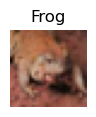

In [20]:
plot_sample(X_test_scaled, y_test_scaled, 5)

In [21]:
y_pred[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [22]:
y_classes = [np.argmax(i) for i in y_pred]

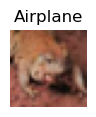

In [23]:
plot_sample(X_test, y_classes, 5)

# MNIST digit dataset training using CNN

In [24]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()

In [25]:
X_train_full.shape

(60000, 28, 28)

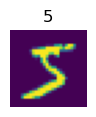

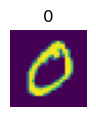

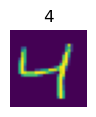

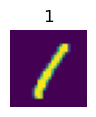

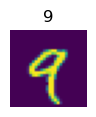

In [26]:
for i in range(0,5):
    plot_sample(X_train_full, y_train_full, i, digit_lookup=True)

In [27]:
# scale X and y data 
X_train_scaled = X_train_full/255.0
X_test_scaled = X_test/255.0 

y_train_scaled = keras.utils.to_categorical(y_train_full)
y_test_scaled = keras.utils.to_categorical(y_test)

In [28]:
y_train_scaled[:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

``` 
Create model

In [29]:
X_train_scaled.shape

(60000, 28, 28)

In [30]:
# create a ANN model which can perform minst dataset classification 
model_c = keras.models.Sequential() 
model_c.add(keras.layers.Flatten(input_shape=(28,28)))
model_c.add(keras.layers.Dense(300, activation="relu"))
model_c.add(keras.layers.Dense(100, activation="relu"))
model_c.add(keras.layers.Dense(10, activation="softmax"))

model_c.compile(loss="categorical_crossentropy", optimizer="SGD", metrics=["accuracy"])
model_c.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [31]:
# Train the model 
model_c.fit(X_train_scaled, y_train_scaled, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.7345 - loss: 0.9424
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9016 - loss: 0.3482
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.9094 - loss: 0.3239
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9141 - loss: 0.3048
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9176 - loss: 0.2933
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.9161 - loss: 0.3008
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.9107 - loss: 0.3142
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.8690 - loss: 0.6219
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.7935 - loss: 3.4712
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.7821 - loss: 20.9977


In [32]:
model_c.evaluate(X_test_scaled, y_test_scaled)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.7740 - loss: 127.6455


[141.28347778320312, 0.7821999788284302]

### Improve performance of the model using CNN

In [33]:
# create a ANN model which can perform minst dataset classification 
model_d = keras.models.Sequential() 

# CNN 
model_d.add(keras.layers.Conv1D(filters=30, kernel_size=3, activation="relu", input_shape=(28, 28)))
model_d.add(keras.layers.MaxPooling1D(2))
model_d.add(keras.layers.Conv1D(filters=60, kernel_size=3, activation="relu"))
model_d.add(keras.layers.MaxPooling1D(2))

# ANN 
model_d.add(keras.layers.Flatten())
model_d.add(keras.layers.Dense(100, activation="relu"))
model_d.add(keras.layers.Dense(10, activation="softmax"))

model_d.compile(loss="categorical_crossentropy", optimizer="SGD", metrics=["accuracy"])
model_d.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 26, 30)         │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 13, 30)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 11, 60)         │         5,460 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 5, 60)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 300)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 39,120 (152.81 KB)

 Trainable params: 39,120 (152.81 KB)

 Non-trainable params: 0 (0.00 B)

In [34]:
# Train the model 
model_d.fit(X_train_scaled, y_train_scaled, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.6198 - loss: 1.2265
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9231 - loss: 0.2612
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9425 - loss: 0.1916
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9511 - loss: 0.1618
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9596 - loss: 0.1372
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9621 - loss: 0.1262
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9656 - loss: 0.1123
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9677 - loss: 0.1077
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.9684 - loss: 0.1030
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9700 - loss: 0.1009


In [35]:
model_d.evaluate(X_test_scaled, y_test_scaled)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9688 - loss: 0.1019


[0.09080030769109726, 0.9724000096321106]

In [36]:
y_pred = model_d.predict(X_test_scaled)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [37]:
y_pred[:10]

array([[8.94405403e-08, 1.27312560e-07, 1.51617414e-05, 7.03652695e-05,
        1.48472916e-14, 1.40822696e-04, 1.10333605e-14, 9.99712765e-01,
        3.26621681e-08, 6.06524045e-05],
       [8.12882536e-06, 7.60940966e-05, 9.99902487e-01, 1.10144238e-05,
        4.01363106e-14, 6.91070682e-07, 8.29306202e-07, 3.57815482e-14,
        7.42875045e-07, 7.29345766e-16],
       [4.33826335e-06, 9.98062432e-01, 1.18319935e-03, 2.44992931e-04,
        1.30038461e-04, 6.79214509e-06, 6.00902240e-05, 1.84231001e-04,
        1.16350158e-04, 7.52979304e-06],
       [9.99384761e-01, 3.24740165e-11, 6.12248608e-04, 1.27661124e-07,
        5.59937030e-09, 1.74665979e-06, 1.04958822e-07, 8.67475819e-07,
        5.66036533e-08, 7.77861757e-08],
       [1.72381764e-09, 6.92507385e-10, 2.88144918e-07, 5.67509488e-08,
        9.99948382e-01, 9.62580238e-09, 4.15685008e-06, 1.03178922e-06,
        8.59628884e-08, 4.59767580e-05],
       [4.42803305e-08, 9.99407768e-01, 1.50729338e-05, 1.97449590e-05,
   

In [38]:
y_classes = [np.argmax(i) for i in y_pred]

In [39]:
y_classes[:10]

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9]

In [40]:
y_test[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

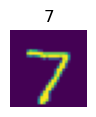

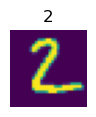

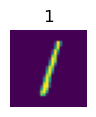

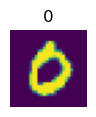

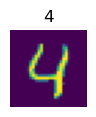

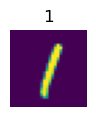

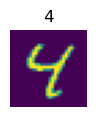

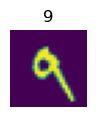

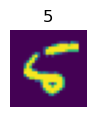

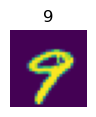

In [41]:
# Lets see the predictions made 
for i in range(0,10):
    plot_sample(X_test_scaled, y_classes, i, digit_lookup=True)

In [42]:
cm = tf.math.confusion_matrix(y_test, y_classes)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 964,    0,    6,    0,    0,    3,    4,    0,    2,    1],
       [   0, 1128,    2,    1,    0,    0,    2,    0,    2,    0],
       [   1,    1, 1014,    8,    1,    0,    1,    6,    0,    0],
       [   1,    0,    2,  993,    0,    5,    0,    3,    0,    6],
       [   1,    0,    0,    0,  971,    0,    4,    0,    0,    6],
       [   3,    2,    2,   14,    0,  858,    6,    0,    0,    7],
       [   7,    3,    4,    0,    4,    3,  934,    0,    3,    0],
       [   0,    5,   11,    9,    0,    0,    0,  997,    0,    6],
       [   6,    9,   15,   13,    7,    3,   13,    6,  893,    9],
       [   4,    7,    3,    6,    9,    1,    0,    5,    2,  972]],
      dtype=int32)>

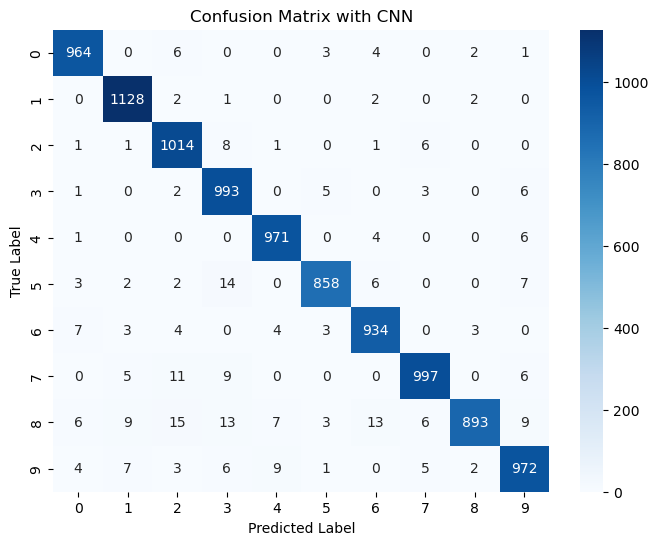

In [43]:
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix with CNN')
plt.show()

In [44]:
# save the model 
import joblib 
joblib.dump(model_d, 'output/video22/mnist_digit.keras')

['output/video22/mnist_digit.keras']

### Using Conv2D 

In [50]:
# create anoher model using Conv2D layer
model_e = keras.models.Sequential() 

# CNN 
model_e.add(keras.layers.Conv2D(filters=30, kernel_size=(4, 4), activation="relu", input_shape=(28, 28, 1)))
model_e.add(keras.layers.MaxPooling2D((2, 2)))
model_e.add(keras.layers.Conv2D(filters=60, kernel_size=(4, 4), activation="relu"))
model_e.add(keras.layers.MaxPooling2D((2, 2)))

# ANN 
model_e.add(keras.layers.Flatten())
model_e.add(keras.layers.Dense(100, activation="relu"))
model_e.add(keras.layers.Dense(10, activation="softmax"))

model_e.compile(loss="categorical_crossentropy", optimizer="SGD", metrics=["accuracy"])
model_e.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 25, 25, 30)     │           510 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 12, 12, 30)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 9, 9, 60)       │        28,860 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 4, 4, 60)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 960)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 100)            │        96,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 126,480 (494.06 KB)

 Trainable params: 126,480 (494.06 KB)

 Non-trainable params: 0 (0.00 B)

In [51]:
model_e.fit(X_train_scaled, y_train_scaled, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 12ms/step - accuracy: 0.6633 - loss: 1.0475
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.9495 - loss: 0.1699
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.9636 - loss: 0.1175
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.9696 - loss: 0.0998
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.9729 - loss: 0.0933
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.9757 - loss: 0.0851
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 151s 81ms/step - accuracy: 0.9749 - loss: 0.0837
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.9767 - loss: 0.0840
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.9724 - loss: 0.1017
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.9712 - loss: 0.1213


In [52]:
model_e.evaluate(X_test_scaled, y_test_scaled)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9683 - loss: 0.1678


[0.13063417375087738, 0.9750000238418579]

In [53]:
y_pred_1 = model_e.predict(X_test_scaled)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [54]:
y_classes_1 = [np.argmax(i) for i in y_pred_1]
cm_1 = tf.math.confusion_matrix(y_test, y_classes_1)

In [55]:
cm_1

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 971,    1,    0,    0,    0,    0,    0,    5,    1,    2],
       [   1, 1114,    5,    3,    1,    1,    1,    9,    0,    0],
       [   0,    2, 1017,    3,    0,    0,    0,    8,    2,    0],
       [   1,    0,    1,  991,    0,    5,    0,    9,    2,    1],
       [   1,    0,    2,    2,  972,    0,    0,    3,    0,    2],
       [   2,    1,    1,    4,    0,  878,    1,    3,    1,    1],
       [  10,    4,    2,    0,    5,   27,  904,    0,    6,    0],
       [   0,    3,   13,    4,    2,    0,    0, 1003,    2,    1],
       [   6,    0,    2,   12,    3,    6,    0,    7,  936,    2],
       [   1,    2,    0,    4,   19,    4,    0,   14,    1,  964]],
      dtype=int32)>

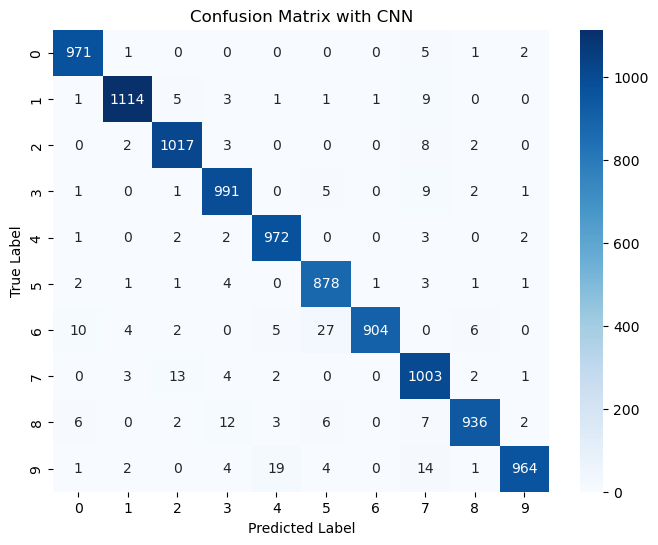

In [56]:
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(cm_1, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix with CNN')
plt.show()

In [57]:
joblib.dump(model_e, 'output/video22/mnist_conv2d.keras')

['output/video22/mnist_conv2d.keras']